# Step 1 making the structure using ASE

Import all needed packages
Genrate the crystal from crystal structure
cut the crystal ensuring that the lattice is orientated in cell right
multiply the cell to make more structure

In [1]:
import ase
import ase.spacegroup
from ase.spacegroup import crystal
from ase.visualize import view
from ase.io import read

import numpy as np
%matplotlib notebook




CuS has been observed to occur as a hexagonal structure p6/mmc (194)

In [2]:
#Calculating the crystal
# a, b refer to the lattice constants

a = 3.77
b = 3.77
c = 16.33  



basis_positions = [(2/3, 1/3, 3/4), (2/3, 1/3, 1/4), (0, 0, 0.435872), (1/3, 2/3, 0.393652)]

primitive_structure = ase.spacegroup.crystal(['S', 'Cu', 'S', 'Cu'],
                                basis=basis_positions,
                                spacegroup=194,  # Space group for wurtzite ZnO
                                cellpar=[a, a, c, 90, 90, 120]
                                )

CuS_repeated_structure=primitive_structure.repeat((5, 5, 3))

CuS_repeated_structure.center(vacuum=10, axis=(0,1,2))

In [3]:
view(primitive_structure)
view(CuS_repeated_structure)

<Popen: returncode: None args: ['C:\\Users\\Joshu\\anaconda3\\envs\\myenv\\p...>

In [5]:
CuS_repeated_structure.cell

Cell([[18.85, 0.0, 0.0], [-9.424999999999995, 16.32457886133667, 0.0], [0.0, 0.0, 16.33]])

# Step 2 using the surface energies to make a wulffconstruct

In [8]:
from wulffpack import SingleCrystal
from ase.build import bulk
from ase.io import write
import wulffpack as wp

<IPython.core.display.Javascript object>


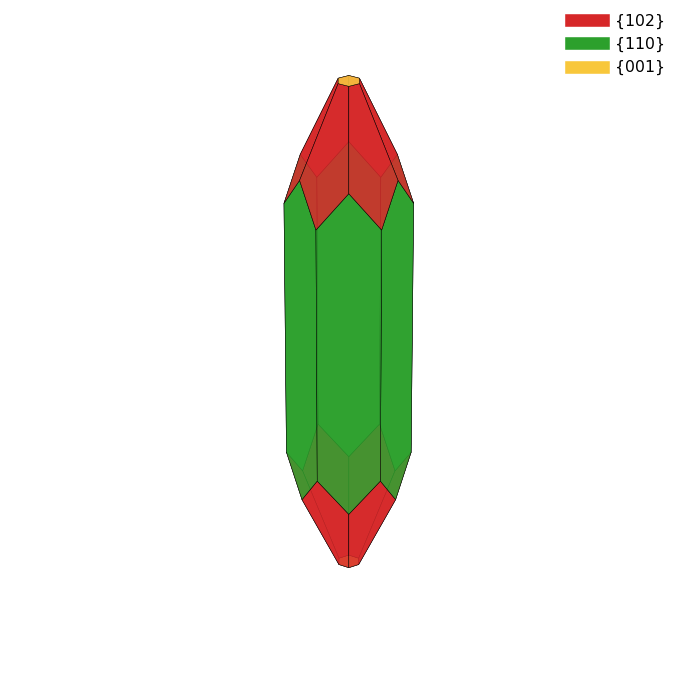

In [9]:
prim = primitive_structure
surface_energies = {(1, 0, 2): 0.649,
                    (1, 1, 0): 0.318,
                    (0, 0, 1): 1.60}


particle = SingleCrystal(surface_energies,
                         primitive_structure=prim,
                         natoms=500,
                         )

particle.view()


In [10]:
write('CuS_500.cif', particle.atoms)
